
# Design Optimization: HW3

## Seyed Yousef Soltanian 
 ### you can find the file at https://github.com/YousefSoltanian/MAE598_Design_Optimization.git

### Problem 1:

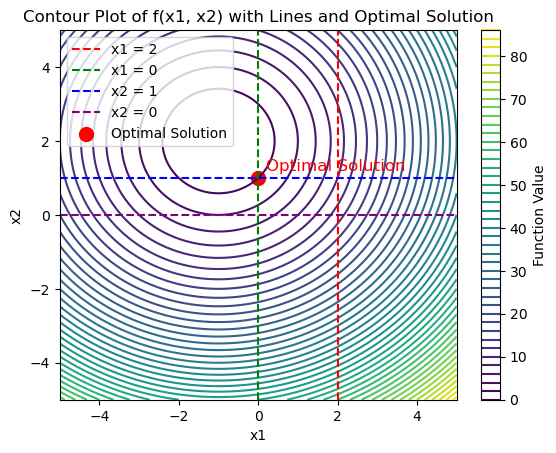

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def f(x1, x2):
    return (x1 + 1) ** 2 + (x2 - 2) ** 2


x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)


x1, x2 = np.meshgrid(x1, x2)


z = f(x1, x2)


plt.contour(x1, x2, z, levels=50, cmap='viridis')


plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Function Value')


plt.axvline(x=2, color='red', linestyle='--', label='x1 = 2')
plt.axvline(x=0, color='green', linestyle='--', label='x1 = 0')
plt.axhline(y=1, color='blue', linestyle='--', label='x2 = 1')
plt.axhline(y=0, color='purple', linestyle='--', label='x2 = 0')


optimal_x1 = 0
optimal_x2 = 1
plt.scatter(optimal_x1, optimal_x2, color='red', marker='o', s=100, label='Optimal Solution')
plt.text(optimal_x1 + 0.2, optimal_x2 + 0.2, 'Optimal Solution', fontsize=12, color='red')


plt.legend()
plt.title('Contour Plot of f(x1, x2) with Lines and Optimal Solution')
plt.show()


AS we can see in the above plot, the optimal solution is at the corner $(0,1)$. now to verify that we are going to show the direction of $-\frac{\partial{f}}{\partial{x}}$ on the boundries, especially the mentioned corner.

\begin{equation}
-\frac{\partial{f}}{\partial{x}} = -\begin{pmatrix} 2x_1+2 \\ 2x_2-4 \end{pmatrix} \\
x=(0,1) \rightarrow -\frac{\partial{f}}{\partial{x}} = -\begin{pmatrix} 2 \\ -2 \end{pmatrix} \\
x=(2,1) \rightarrow -\frac{\partial{f}}{\partial{x}} = -\begin{pmatrix} 6 \\ -2 \end{pmatrix} \\
x=(2,0) \rightarrow -\frac{\partial{f}}{\partial{x}} = -\begin{pmatrix} 4 \\ -4 \end{pmatrix} \\
x=(0,0) \rightarrow -\frac{\partial{f}}{\partial{x}} = -\begin{pmatrix} 2 \\ -4 \end{pmatrix} \\
\end{equation}

We also knwo that, all the $\mu_{i}g_{i}$s are normal to the boundries, so using this fact and using the code below, we get the all the vectors and check the kkt conditions and try to see wich corner satisfies the equilibrium condition:


\begin{equation}
-\frac{\partial{f}}{\partial{x}} = \mu_{i}\frac{\partial{g_i}}{\partial{x}} + \mu_{j}\frac{\partial{g_j}}{\partial{x}}
\end{equation}

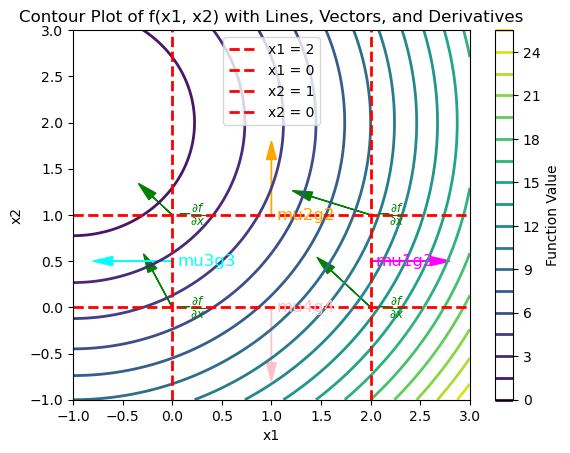

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x1, x2)
def f(x1, x2):
    return (x1 + 1) ** 2 + (x2 - 2) ** 2

x1 = np.linspace(-1, 3, 400)
x2 = np.linspace(-1, 3, 400)

x1, x2 = np.meshgrid(x1, x2)


z = f(x1, x2)
contour = plt.contour(x1, x2, z, levels=20, cmap='viridis', linewidths=2)


plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Function Value')

plt.axvline(x=2, color='red', linestyle='--', label='x1 = 2', linewidth=2)
plt.axvline(x=0, color='red', linestyle='--', label='x1 = 0', linewidth=2)
plt.axhline(y=1, color='red', linestyle='--', label='x2 = 1', linewidth=2)
plt.axhline(y=0, color='red', linestyle='--', label='x2 = 0', linewidth=2)


vectors = [(-1, 2), (-2, 2), (-3, 1), (-1, 1), (0, 3), (-3,0), (3,0), (0,-3)]
colors = ['green', 'green', 'green', 'green','orange', 'cyan', 'magenta', 'pink']
labels = [r'$-\frac{\partial f}{\partial x}$', r'$-\frac{\partial f}{\partial x}$', r'$-\frac{\partial f}{\partial x}$',  r'$-\frac{\partial f}{\partial x}$', 'mu2g2','mu3g3','mu1g3','mu4g4']
points = [(0, 0), (2, 0), (2, 1), (0, 1), (1, 1), (0, 0.5), (2,0.5), (1,0)]

for point, vector, color, label in zip(points, vectors, colors, labels):
    scaled_vector = (vector[0] * 0.2, vector[1] * 0.2)  # Scale the vectors
    plt.arrow(point[0], point[1], scaled_vector[0], scaled_vector[1], head_width=0.1, head_length=0.2, fc=color, ec=color)
    plt.text(point[0] + 0.05, point[1] - 0.05, label, fontsize=12, color=color)


plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.legend()
plt.title('Contour Plot of f(x1, x2) with Lines, Vectors, and Derivatives')
plt.show()


According to the dircetions of the vectors in the above plot, the only answer that can satisfies the equilibrium condition is agaim the point (0,1).

based on this result, we can see that $\mu_1 = 0 , \mu_4 =0$, so we are going to have:

\begin{equation}
-\frac{\partial{f}}{\partial{x}} = \mu_{i}\frac{\partial{g_i}}{\partial{x}} + \mu_{j}\frac{\partial{g_j}}{\partial{x}} 
\end{equation}

\begin{equation}
-\frac{\partial{f}}{\partial{x}}_{(0,1)} = \begin{pmatrix} -2 \\ 2 \end{pmatrix} = -\mu_3 \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \mu_2 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\
\rightarrow \mu_3 = 2 > 0 , \mu_2 = 2 > 0
\end{equation}

which sastisfies the KKT conditions as we expected.


### Problem 2:

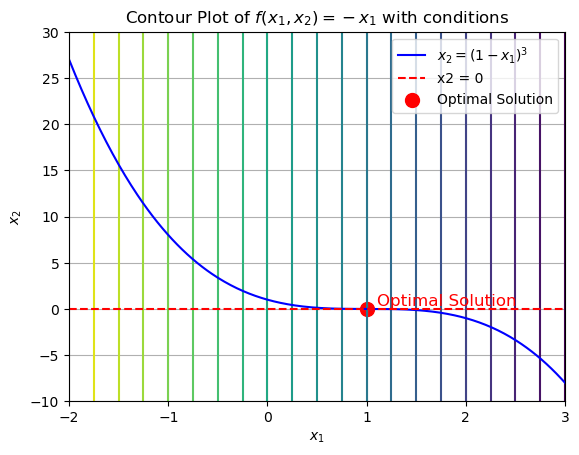

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x1, x2) = -x1
def f(x1, x2):
    return -x1

x1 = np.linspace(-2, 3, 1000)
x2 = np.linspace(-10, 30, 1000)


x1, x2 = np.meshgrid(x1, x2)


z = f(x1, x2)


contour = plt.contour(x1, x2, z, levels=20, cmap='viridis')


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


implicit_x1 = np.linspace(-2, 3, 400)
implicit_x2 = (1 - implicit_x1)**3


plt.plot(implicit_x1, implicit_x2, label='$x_2 = (1 - x_1)^3$', color='blue')


plt.axhline(y=0, color='red', linestyle='--', label='x2 = 0')

optimal_x1 = 1
optimal_x2 = 0
plt.scatter(optimal_x1, optimal_x2, color='red', marker='o', s=100, label='Optimal Solution')
plt.text(optimal_x1 + 0.1, optimal_x2 + 0.4, 'Optimal Solution', fontsize=12, color='red')


plt.title('Contour Plot of $f(x_1, x_2) = -x_1$ with conditions')


plt.grid()
plt.legend()
plt.show()


now if we want to solve this problem using kkt, we knwo that both inequality conditions are active, so we have:

\begin{equation}
-\frac{\partial{f}}{\partial{x}} = \mu_{1}\frac{\partial{g_1}}{\partial{x}} + \mu_{2}\frac{\partial{g_2}}{\partial{x}}
\end{equation}
\begin{equation}
\begin{pmatrix} -1 \\ 0 \end{pmatrix} = \mu_{1}\begin{pmatrix} -3(x_1 - 1)^2 \\ 1 \end{pmatrix} + \mu_{2}\begin{pmatrix} 0 \\ -1 \end{pmatrix}
\end{equation}

solving the above 2 equations is possible only when two inequality constraints are activeated at the same time, because if we assume that g2 constraint is inactive, then we can not satisfies the second equation, if we assume that g1 is inactive, we can not find any answer for $x_1$. so both constraint should be active, which will give us the intersection of two line $x=(1,0)$ which is the only possible answer.
but according to the problem, we can not simply put the answer to the equation and see if $\mu_1 > 0 or mu_2>0$ as it makes the coefficient of $\mu_1$ equal to zero, so although we can find an answer based on the KKT equation, it is now posssible to check the conditions the way we used to do.

### Problem 3:

we use the Lagrangian method to solve this problem:

\begin{equation}
-\frac{\partial{f}}{\partial{x}} + \lambda\frac{\partial{h}}{\partial{x}} = 0 \\
\begin{pmatrix} -2x_1 \\ -2x_2 \\ -2x_3 \end{pmatrix} + \lambda\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} = 0
\end{equation}

\begin{equation}
x1 + x2 + x3 = 3
\end{equation}

so obviously the answer to the above set of equation is:

\begin{equation}
x_1 = 1 , x_2 = 1 , x_3 =1 , \lambda = 2
\end{equation}

obviously, this is the only answer of above set of equations, which minimize the function $-f$ and maximize the function $f$


### Problem 4:

In [175]:
import numpy as np


def h(d , x):
    output = np.zeros(2)
    output[0] = (d**2)/4 + (s[0]**2)/5 + (s[1]**2)/25 - 1
    output[1] = d + s[0] - s[1]
    
    return output

def f(d,s):
    return d**2 + s[0]**2 + s[1]**2


def dhdx(d,s):
    J = np.zeros((2, 2))
    J[0, 0] = 2*s[0] / 5
    J[0, 1] = 2*s[1] / 25
    J[1, 0] = 1
    J[1, 1] = -1
    return J

def dhdd(d,s):
    output = np.zeros(2)
    output[0] = (s[0])/2
    output[1] = 1
    return output

def dfdx(d,s):
    output = np.zeros(2)
    output[0] = 2*s[0]
    output[0] = 2*s[1]
    return np.transpose(output)


# initializing
x = np.array([0,5/(6**0.5), 5/(6**0.5)])
d = x[0]
s = x[1:3]

dfdd = 2*d - dfdx(d,s)@np.linalg.inv(dhdx(d,s))@dhdd(d,s)



while dfdd**2>0.001:
    a = 1
    b = 0.5
    t = 0.3
    fa = f(d-a*dfdd,s+np.transpose(a*np.linalg.inv(dhdx(d,s))@dhdd(d,s)*dfdd))
    ga = f(d,s)-a*t*(dfdd**2)

    #line search
    while ((fa)>(ga)and(a>0.00001)):
        fa = f(d-a*dfdd,s+np.transpose(a*np.linalg.inv(dhdx(d,s))@dhdd(d,s)*dfdd))
        ga = f(d,s)-a*t*(dfdd**2)
        a = b*a
    d = d-a*dfdd
    s0 = s + np.transpose(a*np.linalg.inv(dhdx(d,s))@dhdd(d,s)*(dfdd))
    s_temp = np.transpose(s0)
    
    # Newton Raphson
    while np.linalg.norm(h(d,s)) > 0.001:
        s_temp = s_temp - np.linalg.inv(dhdx(d,s))@h(d,s)
        s = np.transpose(s_temp)                                

    # update 
    dfdd = 2*d - dfdx(d,s)@np.linalg.inv(dhdx(d,s))@dhdd(d,s)
    
    #print(dfdd)

x[0] = d
x[1:3] = s

print("the answer is:")
print(x)
print("the objective function is:")
print(f(d,s))


the answer is:
[1.85660464 0.00255967 1.85916457]
the objective function is:
6.903480248279823


### Problem 5:

we define the variable $x_{ij}$ which is 1 when the truck takes the route between nodes $i , j$ and zero when the truck does not take the mentioned route. so our cost function to minimize will be:

$$
Minimize_x: \
f(x) = \sum_{j \in N} \sum_{i \in N} x_{i,j}c_{i,j} 
$$

our goal is to find the best sets of $x_{i,j}$.

we know that the truck should visit every node atleast once, so this Will gives us $N$ inequality constraints:

$$
for \ all \ js \in N \sum_{i \in N} x_{i,j} >= 1
$$

if we are limitted to visiting every node only once, the above inequalty should change to equality.

Also to make sure that the truck leaves all the stations we have:

$$
for \ all \ is \in N \sum_{j \in N} x_{i,j} >= 1
$$

again, if we are limitted to visiting every node only once, the above inequalty should change to equality.

to ensure that the truck leaves from  the initial station we have:

$$
\sum_{j \in N} x_{0,j} = 1
$$

Also, to ensure that the truck can come back to the station we should have:

$$
\sum_{i \in N} x_{i,0} = 1
$$

the final condition that needs to be satisfied, is preventing sobtures from happening. for example, we do not want two or more compeletly seperate loops, the all need to be connected.

we make be sure that the graph is a connected graph if the numner of active routes is more than the number of nodes, the the final constraint will be:
$$
\sum_{i=1}^N\sum_{j=1}^i x_{i,j} >= N
$$